**EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering**

In [9]:
!pip install numpy


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
%pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


TypeError: Image data of dtype object cannot be converted to float

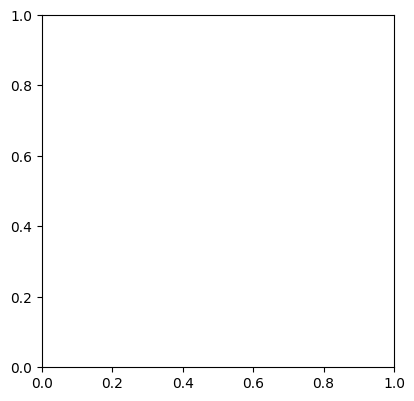

In [24]:
import cv2 # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Load the image
img = cv2.imread("D:\sem 5\2.Machine vision\Assignments\a1images\a1images\emma.jpg", cv2.IMREAD_GRAYSCALE)
# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Define the intensity transformation function
def intensity_transform(value):
    if value < 50:
        return int(5.1 * value)  # First linear segment
    elif value < 150:
        return int(0.7 * value + 150 - 0.7 * 150)  # Second linear segment
    else:
        return int(1.2 * value - 200)  # Third linear segment

# Apply the transformation to the image
transformed_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        transformed_img[i, j] = intensity_transform(img[i, j])

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()
